In [35]:
import json
import matplotlib.pyplot as plt

In [43]:
import json
import matplotlib.pyplot as plt
with open('loss_value/gen_loss_0_1000.json') as f:
  gen_data = json.load(f)
with open('loss_value/disc_loss_0_1000.json') as f:
  disc_data = json.load(f)

In [44]:
gen_loss = []
disc_loss = []
for i in range(10):
    gen_loss = gen_loss + gen_data[f'epoch{(i + 1) * 100}']
    disc_loss = disc_loss + disc_data[f'epoch{(i + 1) * 100}']

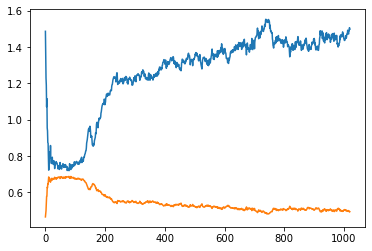

In [45]:
plt.plot(gen_loss)
plt.plot(disc_loss)

In [1]:
import numpy as np
import torch
import numpy as np
import sys, os
currentdir = os.path.dirname(os.path.abspath(''))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
print(parentdir)

/Users/dengnaicheng/Developer/intro_GANs/gansForPolymer/Naicheng


In [36]:
import model as model
import res.process_data.slice_output as so
import res.fnn.functions as func
import res.process_data.dire_and_coor as dc

In [40]:
generator = model.GeneratorNet()
checkpoint_1 = torch.load('local_models/model_gan_100.pth.tar')
checkpoint = torch.load('local_models/model_gan_1000.pth.tar')
generator.state_dict(checkpoint_1['gen_state_dict'])
# print(checkpoint_1)
# print(checkpoint)
print('done')

done


<AxesSubplot:ylabel='Count'>

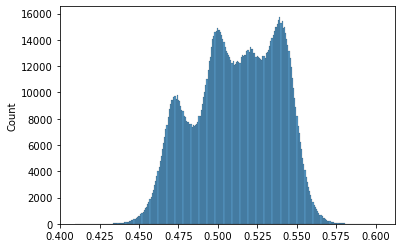

In [41]:
noise = func.get_noise(100000, 8)
output = generator(noise).data.numpy()
import seaborn as sns
a = []
for i in output:
    for j in i:
        a.append(j)
sns.histplot(a)


In [ ]:
direction = np.round(so.slice_direction(output) * 4) / 4
print(direction)

In [20]:
coordinate = dc.direction_coordinate_three(direction, 16)

In [21]:
import res.process_data.process_output as po
count = 0
for i in coordinate:
    a = po.check_fold_cross(coordinate[0])
    if a == [0,0]:
        count += 1
print(count)

100000
